In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from streamlit import columns

df = pd.read_csv('result_total.csv')

In [3]:
def add_cyclical_features(data: pd.DataFrame) -> pd.DataFrame:
    out = data.copy()
    out["month_sin"] = np.sin(2*np.pi*out["MesNum"]/12.0)
    out["month_cos"] = np.cos(2*np.pi*out["MesNum"]/12.0)
    min_y, max_y = out["Año"].min(), out["Año"].max()
    out["year_norm"] = (out["Año"] - min_y)
    return out

def add_lags(data: pd.DataFrame, group_col="Isla", target_col="Pasajeros") -> pd.DataFrame:
    out = data.copy()
    for lag in range(1, 13):
        out[f"lag_{lag}"] = out.groupby(group_col)[target_col].shift(lag)
    out["roll3"] = out.groupby(group_col)[target_col].shift(1).rolling(3).mean()
    out["roll6"] = out.groupby(group_col)[target_col].shift(1).rolling(6).mean()
    return out

df_fe = add_cyclical_features(df)
df_fe = add_lags(df_fe)
df_fe = df_fe.dropna().reset_index(drop=True)


print(df_fe)


df_fe.to_csv('result_total_with_lags.csv',index=False)

               Isla       Fecha         Mes   Año  MesNum  Pasajeros  \
0     Fuerteventura  2020-01-01       enero  2020       1     200041   
1     Fuerteventura  2020-02-01     febrero  2020       2     231762   
2     Fuerteventura  2020-03-01       marzo  2020       3      99651   
3     Fuerteventura  2020-04-01       abril  2020       4       1305   
4     Fuerteventura  2020-05-01        mayo  2020       5       2993   
..              ...         ...         ...   ...     ...        ...   
409  Total Canarias  2025-05-01        mayo  2025       5    2016749   
410  Total Canarias  2025-06-01       junio  2025       6    2081654   
411  Total Canarias  2025-07-01       julio  2025       7    2320307   
412  Total Canarias  2025-08-01      agosto  2025       8    2295039   
413  Total Canarias  2025-09-01  septiembre  2025       9    2078523   

        month_sin     month_cos  year_norm      lag_1  ...      lag_5  \
0    5.000000e-01  8.660254e-01          1   231012.0  ...   2

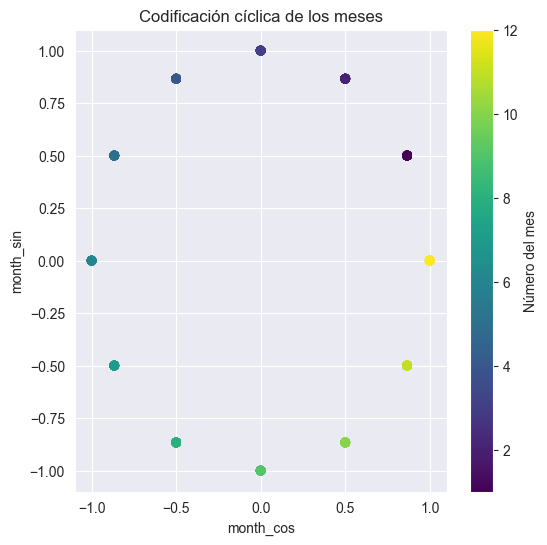

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(df_fe["month_cos"], df_fe["month_sin"], c=df_fe["MesNum"], cmap="viridis")
plt.xlabel("month_cos")
plt.ylabel("month_sin")
plt.title("Codificación cíclica de los meses")
plt.colorbar(label="Número del mes")
plt.show()


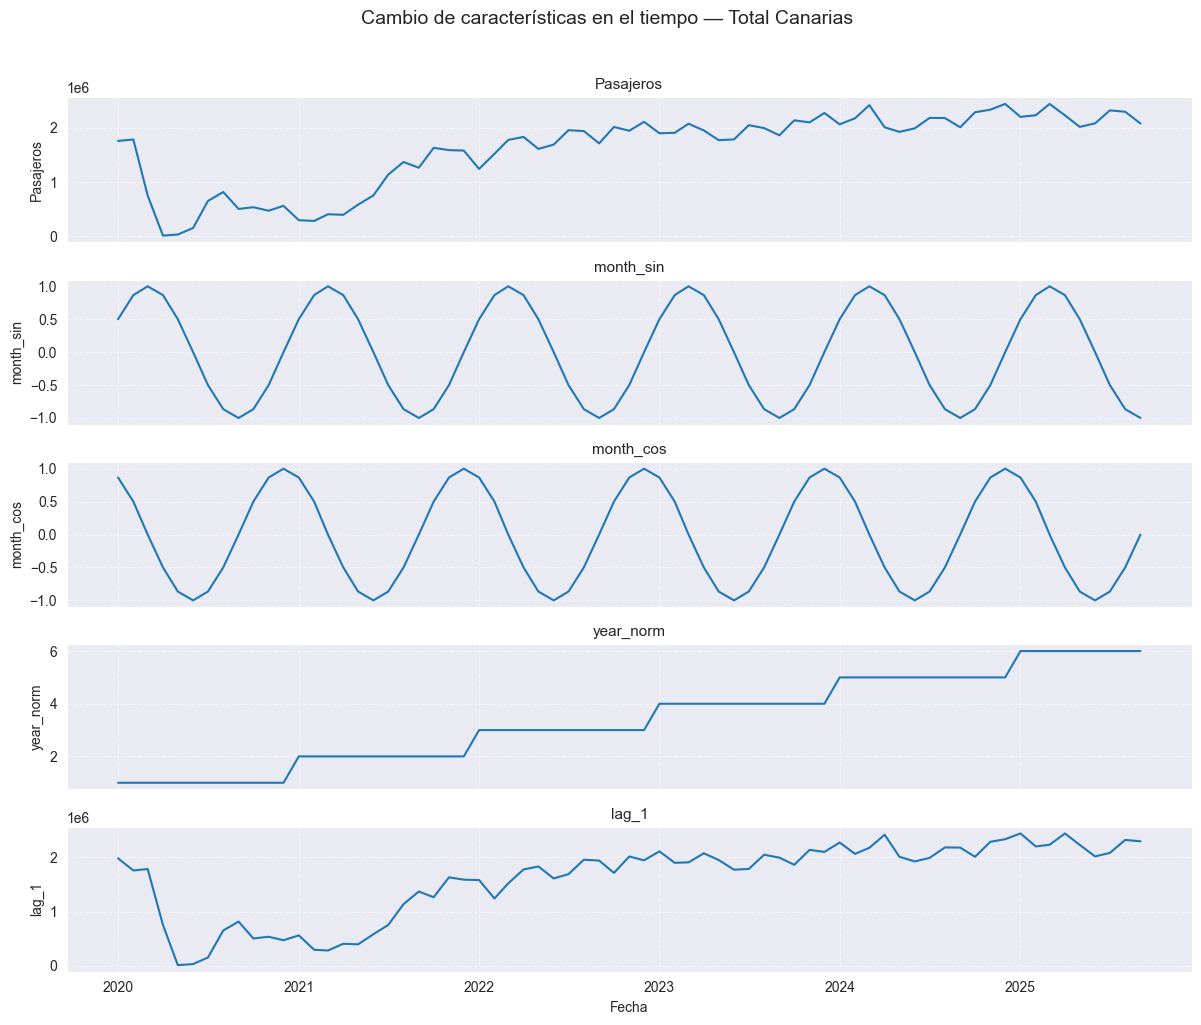

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

df_total = df_fe[df_fe["Isla"] == "Total Canarias"].copy()

df_total["Fecha"] = pd.to_datetime(df_total["Fecha"])

features_to_plot = ["Pasajeros", "month_sin", "month_cos", "year_norm", "lag_1"]

fig, axes = plt.subplots(len(features_to_plot), 1, figsize=(12, 10), sharex=True)

for i, col in enumerate(features_to_plot):
    sns.lineplot(ax=axes[i], data=df_total, x="Fecha", y=col, color="tab:blue")
    axes[i].set_title(col, fontsize=11)
    axes[i].grid(True, linestyle="--", alpha=0.5)

plt.suptitle("Cambio de características en el tiempo — Total Canarias", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


In [6]:
print(df_total[(df_total["Isla"] == "Total Canarias") & (df_total["Año"] >= 2024)])


               Isla      Fecha         Mes   Año  MesNum  Pasajeros  \
393  Total Canarias 2024-01-01       enero  2024       1    2063542   
394  Total Canarias 2024-02-01     febrero  2024       2    2174856   
395  Total Canarias 2024-03-01       marzo  2024       3    2416481   
396  Total Canarias 2024-04-01       abril  2024       4    2009663   
397  Total Canarias 2024-05-01        mayo  2024       5    1924628   
398  Total Canarias 2024-06-01       junio  2024       6    1989492   
399  Total Canarias 2024-07-01       julio  2024       7    2182178   
400  Total Canarias 2024-08-01      agosto  2024       8    2179842   
401  Total Canarias 2024-09-01  septiembre  2024       9    2009806   
402  Total Canarias 2024-10-01     octubre  2024      10    2285857   
403  Total Canarias 2024-11-01   noviembre  2024      11    2333838   
404  Total Canarias 2024-12-01   diciembre  2024      12    2439631   
405  Total Canarias 2025-01-01       enero  2025       1    2200971   
406  T

In [7]:
df_engineered = df_fe.loc[:, [
    "Isla", "Fecha", "Pasajeros", "month_sin", "month_cos", "year_norm",
    "lag_1", "lag_2", "lag_3", "lag_4", "lag_5", "lag_6", "lag_7",
    "lag_8", "lag_9", "lag_10", "lag_11", "lag_12", "roll3", "roll6"
]].copy()

print(df_engineered)
df_engineered.to_csv('result_total_with_lags_coded.csv',index=False)

               Isla       Fecha  Pasajeros     month_sin     month_cos  \
0     Fuerteventura  2020-01-01     200041  5.000000e-01  8.660254e-01   
1     Fuerteventura  2020-02-01     231762  8.660254e-01  5.000000e-01   
2     Fuerteventura  2020-03-01      99651  1.000000e+00  6.123234e-17   
3     Fuerteventura  2020-04-01       1305  8.660254e-01 -5.000000e-01   
4     Fuerteventura  2020-05-01       2993  5.000000e-01 -8.660254e-01   
..              ...         ...        ...           ...           ...   
409  Total Canarias  2025-05-01    2016749  5.000000e-01 -8.660254e-01   
410  Total Canarias  2025-06-01    2081654  1.224647e-16 -1.000000e+00   
411  Total Canarias  2025-07-01    2320307 -5.000000e-01 -8.660254e-01   
412  Total Canarias  2025-08-01    2295039 -8.660254e-01 -5.000000e-01   
413  Total Canarias  2025-09-01    2078523 -1.000000e+00 -1.836970e-16   

     year_norm      lag_1      lag_2      lag_3      lag_4      lag_5  \
0            1   231012.0   225716.0  